In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [55]:
train_data = pd.read_csv('application_train.csv')

In [56]:
train_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [57]:
corr_matrix = train_data.corr()
corr_with_target = abs(corr_matrix['TARGET'])
highly_corr_features = corr_with_target[corr_with_target > 0.6].index.tolist()


In [58]:
highly_corr_features

['TARGET']

In [59]:
test_data = pd.read_csv('application_test.csv')

In [60]:
test_data

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                    0                0                        0.0   
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        NaN   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        NaN   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        NaN                         NaN   
48741                        0.0           

Подивимось на описові статистики навчальних даних

In [61]:
train_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Подивимось скільки в даних missing values. 

In [62]:
train_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [63]:
test_data = test_data.drop(train_data.columns[train_data.isna().sum() > 40000], axis=1)


In [64]:
train_data = train_data.drop(train_data.columns[train_data.isna().sum() > 40000], axis=1)

In [65]:
train_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                     0                0                0                 0   
1                     0                0                0                 0   
2                     0                0                0                 0   
3                     0                0                0                 0   
4                     0                0                0                 0   
...                 ...              ...              ...               ...   
307506                0                0                0                 0   
307507                0                0                0                 0   
307508                0                0                0                 0   
307509                0                0                0                 0   
307510                0                0                0                 0   

        FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0  
1                      0                 0                 0  
2                      0                 0                 0  
3                      0                 0                 0  
4                      0                 0           

In [66]:
test_data

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13  \
0             450000.0  ...                0                0   
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                    0                0                0                 0   
1                    0                0                0                 0   
2                    0                0                0                 0   
3                    0                0                0                 0   
4                    0                0                0                 0   
...                ...              ...              ...               ...   
48739                0                0                0                 0   
48740                0                0                0                 0   
48741                0                0                0                 0   
48742                0                0                0                 0   
48743                0                0                0                 0   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                     0                 0                 0                 0  
1                     0                 0                 0                 0  
2                     0                 0                 0                 0  
3                     0                 0                 0                 0  
4                     0                 0                 0                 0  
...                 ...               ...  

Подивимось на кореляцію даних 

In [67]:
train_data.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                     1.000000 -0.002108     -0.001129   
TARGET                        -0.002108  1.000000      0.019187   
CNT_CHILDREN                  -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL              -0.001820 -0.003982      0.012882   
AMT_CREDIT                    -0.000343 -0.030369      0.002145   
AMT_ANNUITY                   -0.000433 -0.012817      0.021374   
AMT_GOODS_PRICE               -0.000232 -0.039645     -0.001827   
REGION_POPULATION_RELATIVE     0.000849 -0.037227     -0.025573   
DAYS_BIRTH                    -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                  0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION             -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH               -0.000384  0.051457     -0.028019   
FLAG_MOBIL                     0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                -0.001337  0.045982      0.240714   
FLAG_WORK_PHONE               -0.000415  0.028524      0.055630   
FLAG_CONT_MOBILE               0.002815  0.000370     -0.000794   
FLAG_PHONE                     0.002753 -0.023806     -0.029906   
FLAG_EMAIL                     0.000281 -0.001758      0.022619   
CNT_FAM_MEMBERS               -0.002895  0.009308      0.879161   
REGION_RATING_CLIENT          -0.001075  0.058899      0.025423   
REGION_RATING_CLIENT_W_CITY   -0.001138  0.060893      0.024781   
HOUR_APPR_PROCESS_START        0.000350 -0.024166     -0.007292   
REG_REGION_NOT_LIVE_REGION    -0.000283  0.005576     -0.013319   
REG_REGION_NOT_WORK_REGION     0.001097  0.006942      0.008185   
LIVE_REGION_NOT_WORK_REGION    0.002903  0.002819      0.014835   
REG_CITY_NOT_LIVE_CITY        -0.001885  0.044395      0.020072   
REG_CITY_NOT_WORK_CITY        -0.001582  0.050994      0.070650   
LIVE_CITY_NOT_WORK_CITY        0.000067  0.032518      0.069957   
EXT_SOURCE_2                   0.002342 -0.160472     -0.018015   
OBS_30_CNT_SOCIAL_CIRCLE      -0.001409  0.009131      0.015593   
DEF_30_CNT_SOCIAL_CIRCLE      -0.000082  0.032248     -0.001262   
OBS_60_CNT_SOCIAL_CIRCLE      -0.001423  0.009022      0.015232   
DEF_60_CNT_SOCIAL_CIRCLE       0.001187  0.031276     -0.001861   
DAYS_LAST_PHONE_CHANGE        -0.000858  0.055218     -0.005865   
FLAG_DOCUMENT_2                0.000700  0.005417      0.001786   
FLAG_DOCUMENT_3               -0.003411  0.044346      0.056837   
FLAG_DOCUMENT_4               -0.004139 -0.002672     -0.003709   
FLAG_DOCUMENT_5               -0.001097 -0.000316     -0.016737   
FLAG_DOCUMENT_6                0.002121 -0.028602     -0.157024   
FLAG_DOCUMENT_7               -0.002694 -0.001520     -0.001498   
FLAG_DOCUMENT_8                0.001809 -0.008040      0.051697   
FLAG_DOCUMENT_9                0.001505 -0.004352     -0.001997   
FLAG_DOCUMENT_10              -0.000815 -0.001414     -0.002756   
FLAG_DOCUMENT_11              -0.002012 -0.004229     -0.005318   
FLAG_DOCUMENT_12              -0.001045 -0.000756      0.000293   
FLAG_DOCUMENT_13               0.000896 -0.011583      0.003945   
FLAG_DOCUMENT_14              -0.001077 -0.009464     -0.005459   
FLAG_DOCUMENT_15               0.002604 -0.006536      0.003609   
FLAG_DOCUMENT_16              -0.000724 -0.011615      0.010662   
FLAG_DOCUMENT_17               0.001450 -0.003378      0.000773   
FLAG_DOCUMENT_18               0.000509 -0.007952      0.004031   
FLAG_DOCUMENT_19               0.000167 -0.001358      0.000864   
FLAG_DOCUMENT_20               0.001073  0.000215      0.000988   
FLAG_DOCUMENT_21               0.000282  0.003709     -0.002450   

                             AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          -0.001820   -0.000343    -0.000433   
TARGET                              -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                         0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                     1.000000  

In [68]:
corr_matrix = train_data.corr()
corr_with_target = abs(corr_matrix['TARGET'])
highly_corr_features = corr_with_target[corr_with_target > 0.6].index.tolist()


In [69]:
highly_corr_features

['TARGET']

In [70]:
for col in train_data.columns:
    print(col, train_data[col].isna().sum())


SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_2 660
OBS_30_CNT_SOCIAL_CIRCLE 1021
DEF_30_CNT_SOCIAL_CIRCLE 1021
OBS_60_CNT_SOCIAL_CIRCLE 1021
DEF_60_CNT_SOCIAL_CIRCLE 1021
DAYS_LAST_PHONE_CHANGE 1
FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCUMENT_4 0
FLAG_DOCUM

In [98]:
train_data['OBS_30_CNT_SOCIAL_CIRCLE']=train_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(train_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
train_data['DEF_30_CNT_SOCIAL_CIRCLE']=train_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(train_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
train_data['OBS_60_CNT_SOCIAL_CIRCLE']=train_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(train_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
train_data['DEF_60_CNT_SOCIAL_CIRCLE']=train_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(train_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
train_data['NAME_TYPE_SUITE'] = train_data['NAME_TYPE_SUITE'].fillna(train_data['NAME_TYPE_SUITE'].mode()[0])
train_data['AMT_GOODS_PRICE'].fillna(train_data['AMT_GOODS_PRICE'].mean(), inplace=True)
train_data['AMT_ANNUITY'] = train_data['AMT_ANNUITY'].fillna(train_data['AMT_ANNUITY'].median())
train_data['DAYS_LAST_PHONE_CHANGE'] = train_data['DAYS_LAST_PHONE_CHANGE'].fillna(train_data['DAYS_LAST_PHONE_CHANGE'].mode())[0]
train_data['CNT_FAM_MEMBERS'] = train_data['CNT_FAM_MEMBERS'].fillna(train_data['CNT_FAM_MEMBERS'].mean())
train_data['EXT_SOURCE_2'] = train_data['EXT_SOURCE_2'].fillna(train_data['EXT_SOURCE_2'].mean())

In [105]:
test_data['OBS_30_CNT_SOCIAL_CIRCLE']=test_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(test_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0])
test_data['DEF_30_CNT_SOCIAL_CIRCLE']=test_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(test_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0])
test_data['OBS_60_CNT_SOCIAL_CIRCLE']=test_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(test_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
test_data['DEF_60_CNT_SOCIAL_CIRCLE']=test_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(test_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
test_data['NAME_TYPE_SUITE'] = test_data['NAME_TYPE_SUITE'].fillna(test_data['NAME_TYPE_SUITE'].mode()[0])
test_data['AMT_GOODS_PRICE'].fillna(test_data['AMT_GOODS_PRICE'].mean(), inplace=True)
test_data['AMT_ANNUITY'] = test_data['AMT_ANNUITY'].fillna(test_data['AMT_ANNUITY'].median())
test_data['DAYS_LAST_PHONE_CHANGE'] = test_data['DAYS_LAST_PHONE_CHANGE'].fillna(test_data['DAYS_LAST_PHONE_CHANGE'].mode())[0]
test_data['CNT_FAM_MEMBERS'] = test_data['CNT_FAM_MEMBERS'].fillna(test_data['CNT_FAM_MEMBERS'].mean())
test_data['EXT_SOURCE_2'] = test_data['EXT_SOURCE_2'].fillna(test_data['EXT_SOURCE_2'].mean())

In [106]:
for col in train_data.columns:
    print(col, train_data[col].isna().sum())


SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 0
AMT_GOODS_PRICE 0
NAME_TYPE_SUITE 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
CNT_FAM_MEMBERS 0
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_2 0
OBS_30_CNT_SOCIAL_CIRCLE 0
DEF_30_CNT_SOCIAL_CIRCLE 0
OBS_60_CNT_SOCIAL_CIRCLE 0
DEF_60_CNT_SOCIAL_CIRCLE 0
DAYS_LAST_PHONE_CHANGE 0
FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCUMENT_4 0
FLAG_DOCUMENT_5 0
FLAG_DOCUMEN

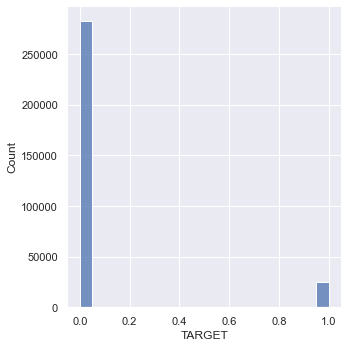

In [107]:
import seaborn as sns
sns.displot(train_data['TARGET'])

Бачимо, що в нас незбалансовані дані, подивимось у відостках.

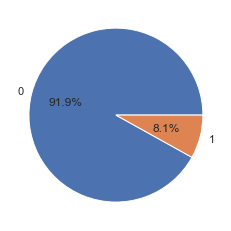

In [108]:
import matplotlib.pyplot as plt

labels = ['0', '1']
sizes = train_data['TARGET'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()


Подивимось на розподіли ознак

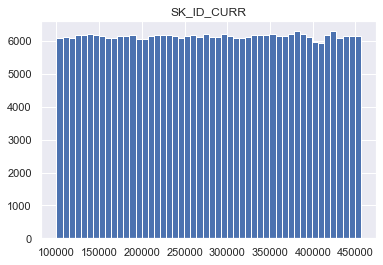

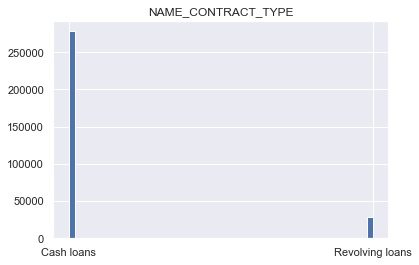

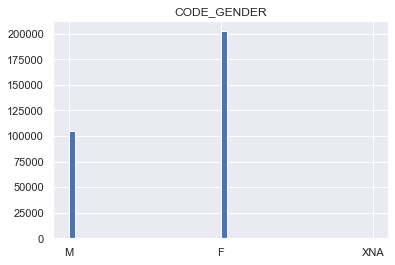

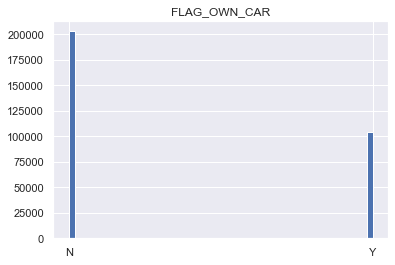

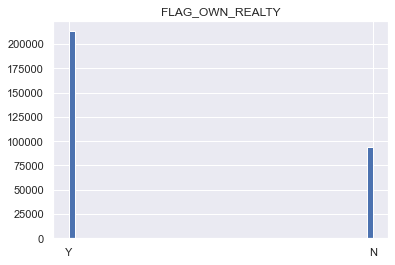

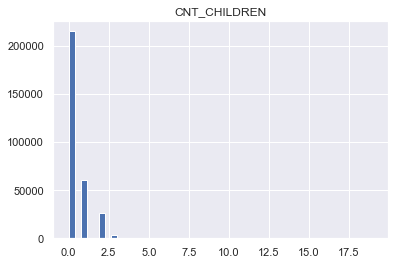

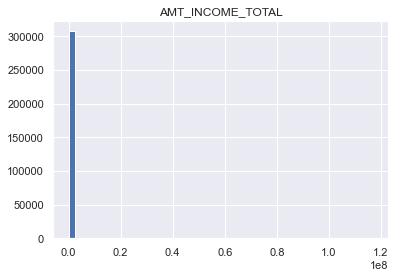

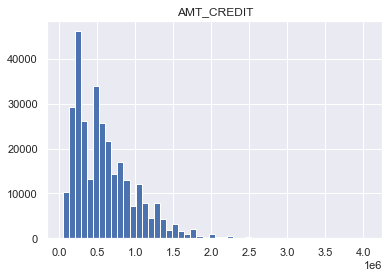

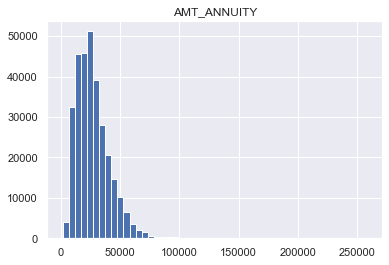

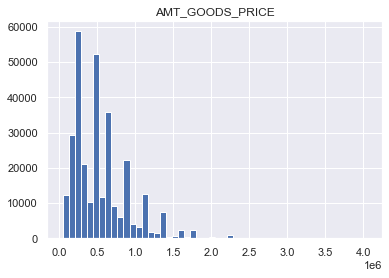

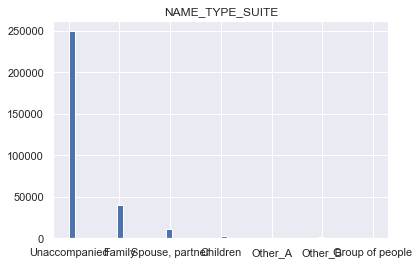

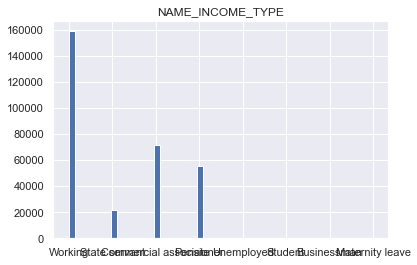

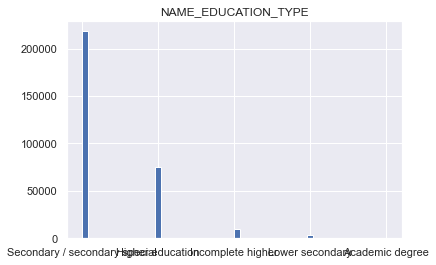

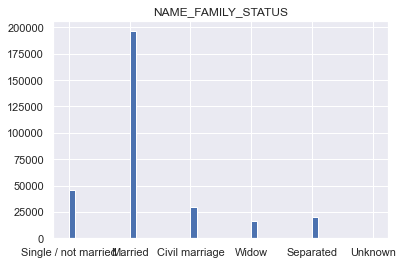

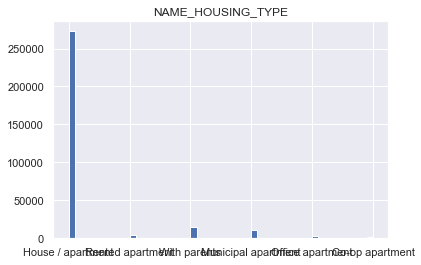

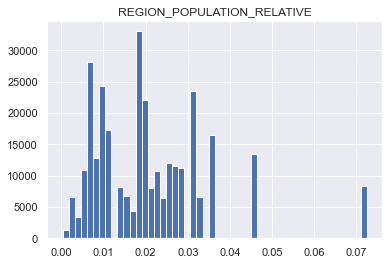

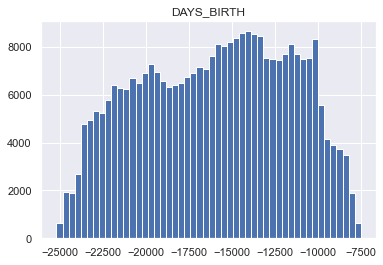

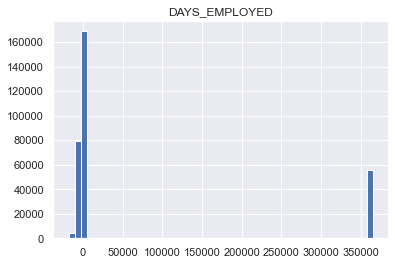

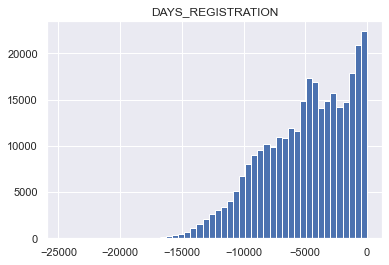

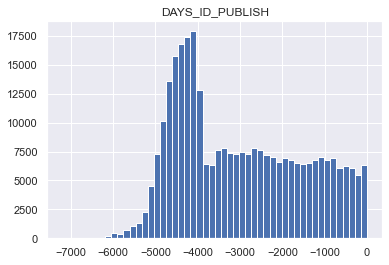

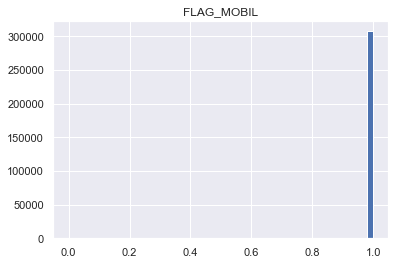

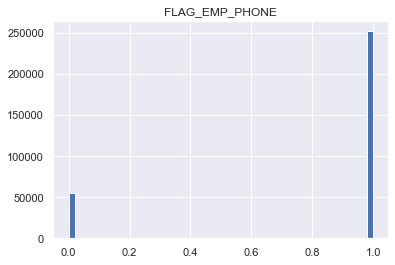

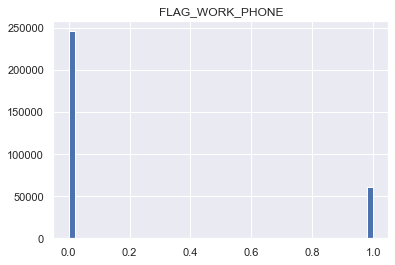

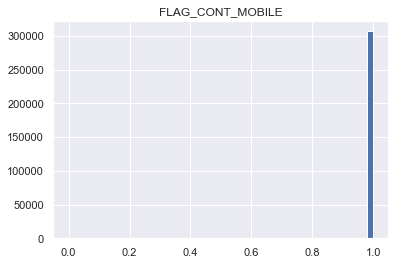

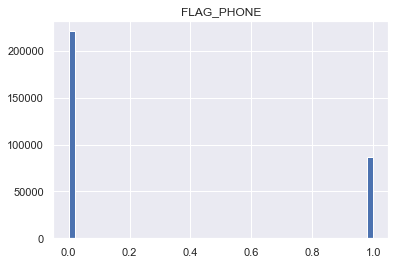

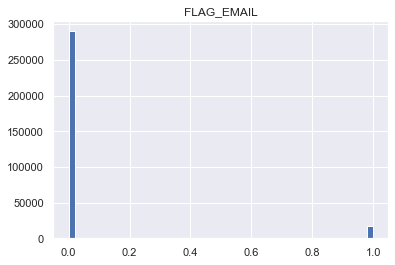

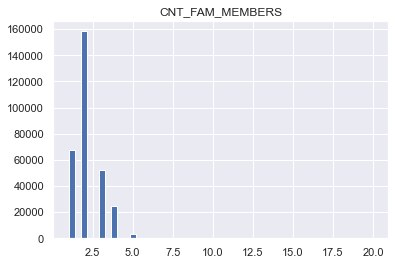

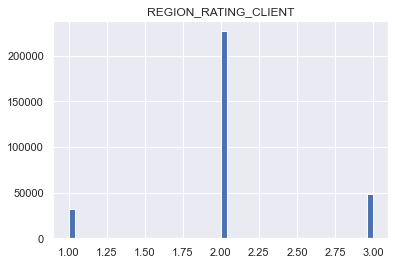

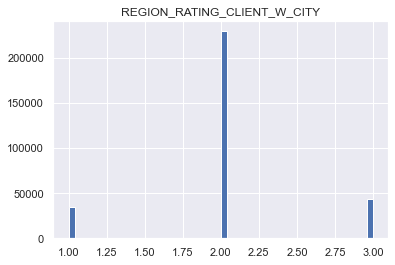

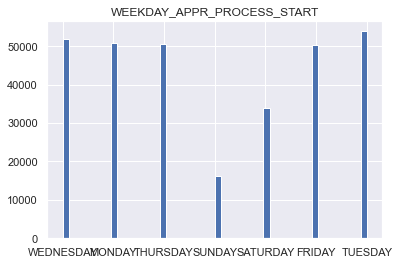

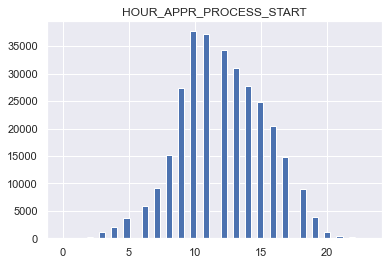

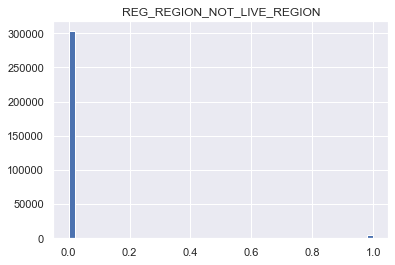

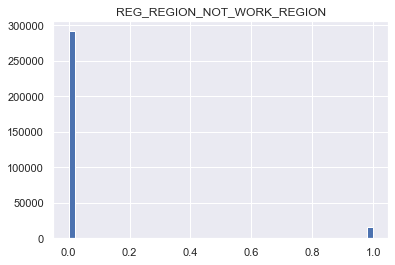

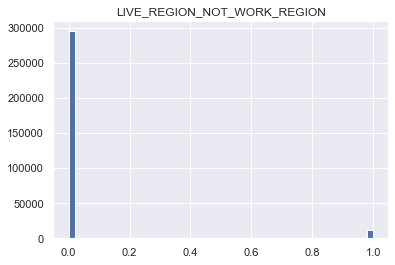

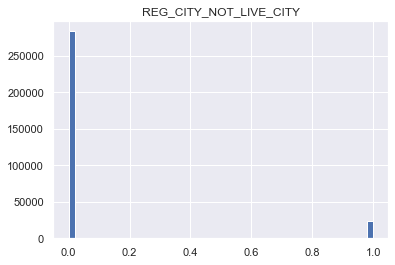

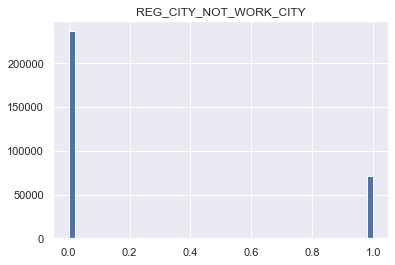

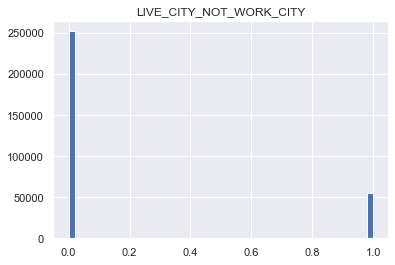

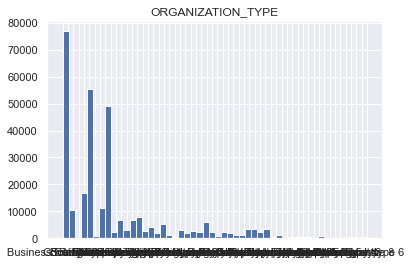

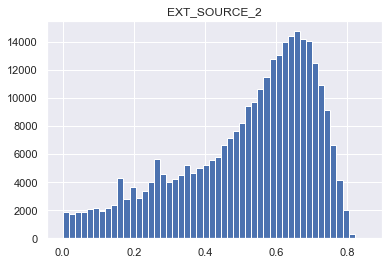

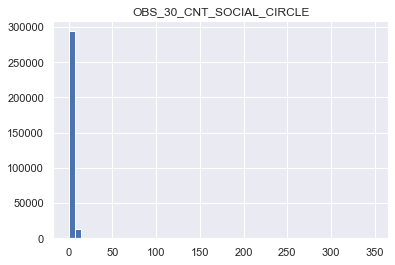

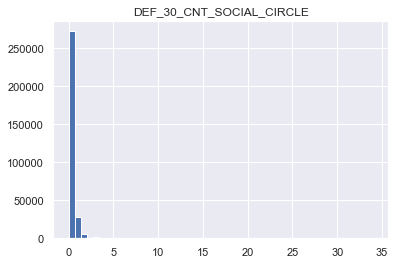

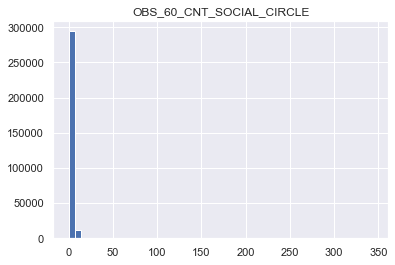

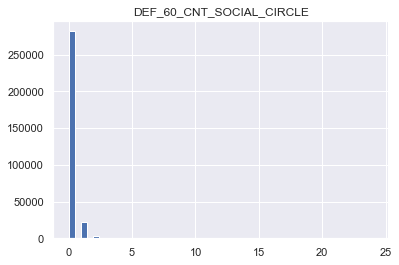

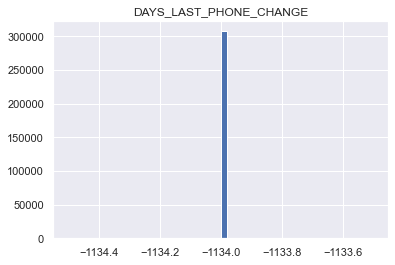

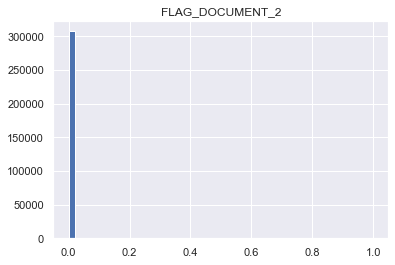

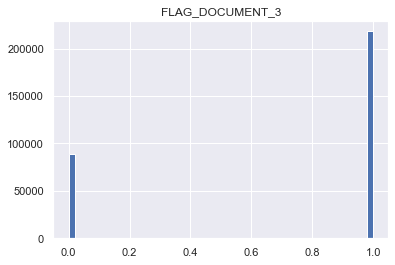

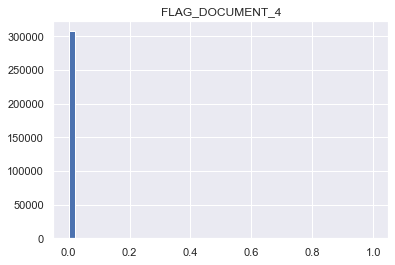

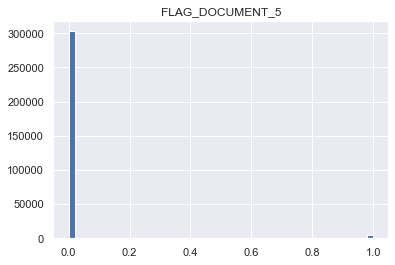

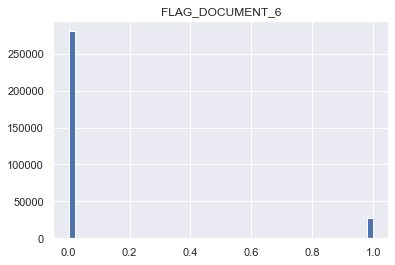

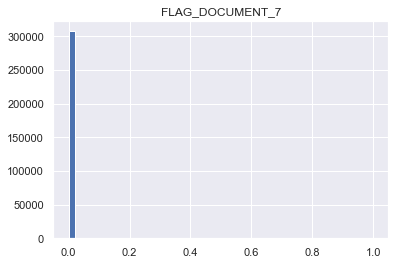

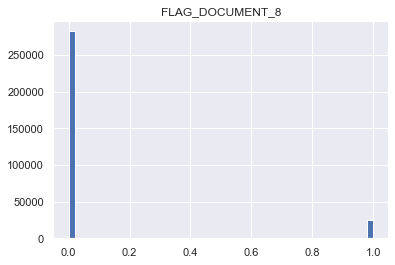

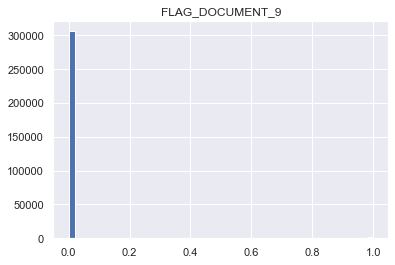

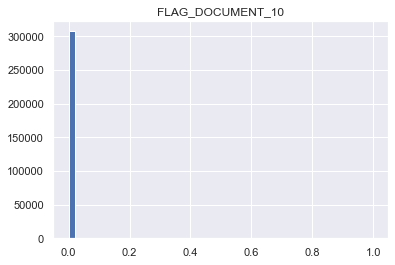

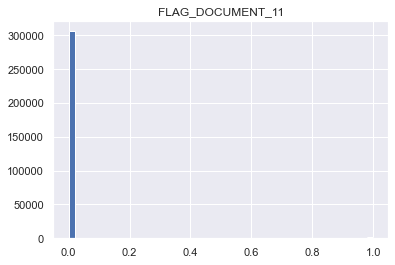

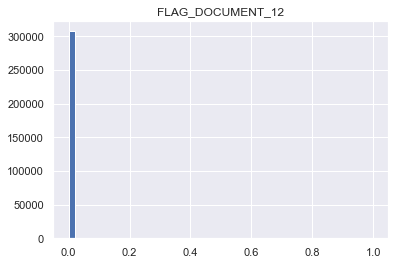

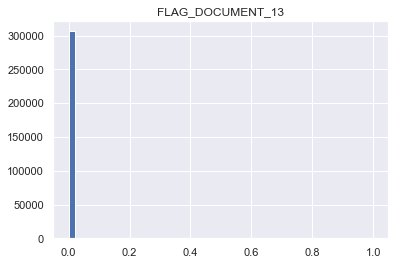

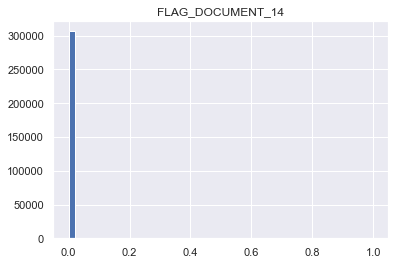

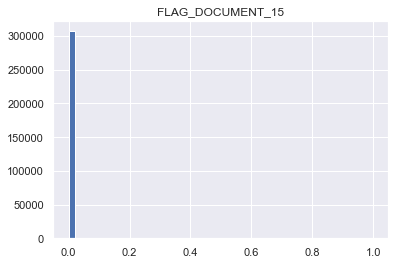

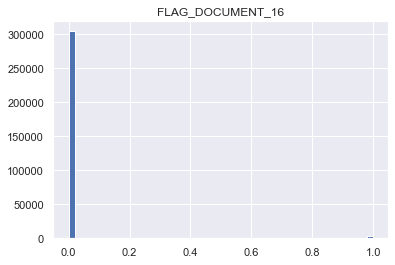

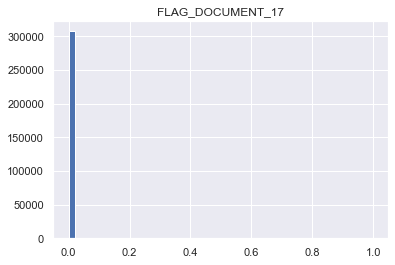

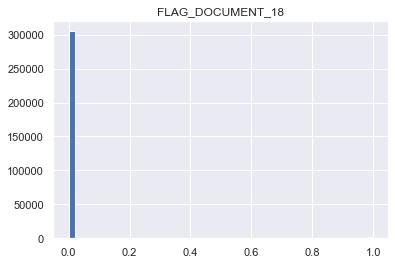

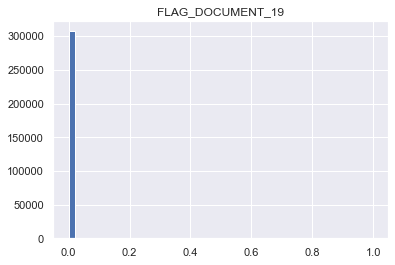

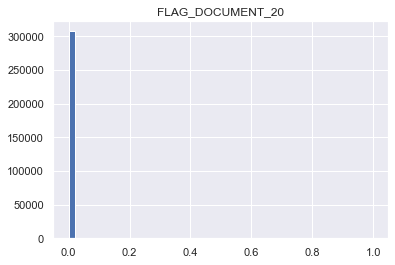

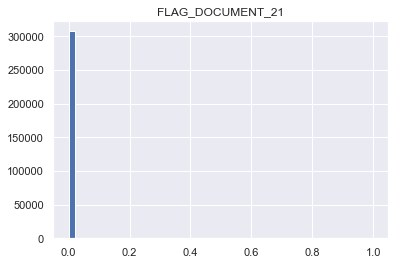

In [109]:
for column in train_data.columns:
    if column != 'TARGET':
        plt.hist(train_data[column], bins=50)
        plt.title(column)
        plt.show()

In [110]:
import seaborn as sns

<Figure size 432x288 with 0 Axes>

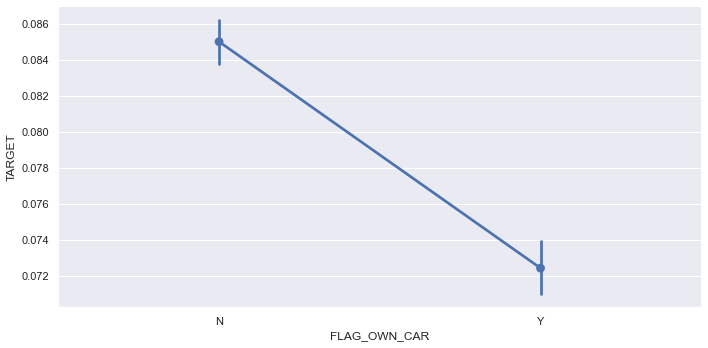

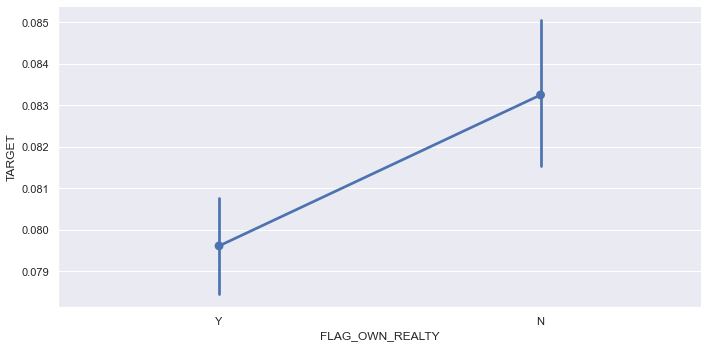

In [111]:
for i,col in enumerate(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']):
    plt.figure(i)
    sns.catplot(x = col, y='TARGET', data = train_data, kind = 'point', aspect=2,)

На графіку для 'FLAG_OWN_CAR' можна побачити, що частка позитивних значень цільової змінної вища для клієнтів, у яких є автомобіль ('Y'), ніж для клієнтів, у яких немає ('N'). Аналогічно, на графіку для 'FLAG_OWN_REALTY' можна побачити, що частка позитивних значень цільової змінної вища для клієнтів, які мають нерухомість ('Y'), ніж для клієнтів, у яких її немає ('N').

Подивимось на розподіл ознак відносно цільової змінної 

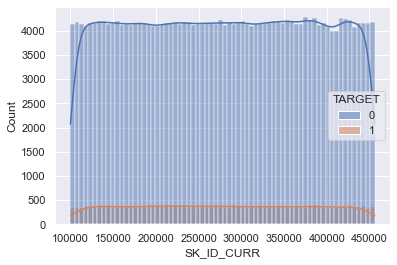

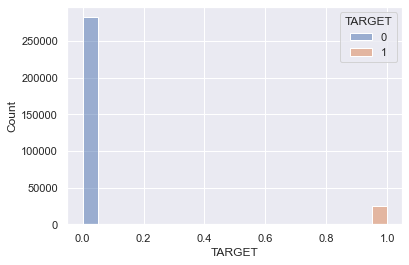

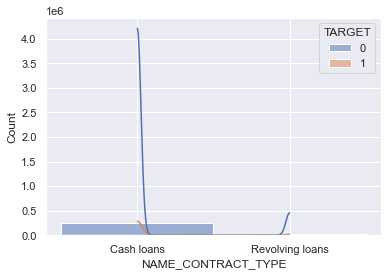

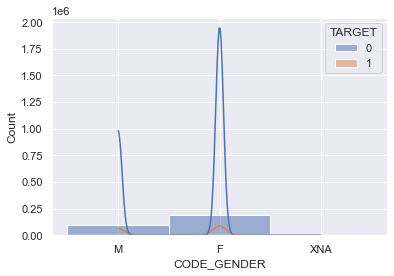

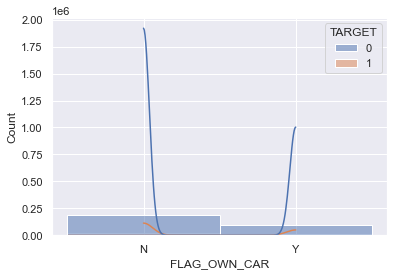

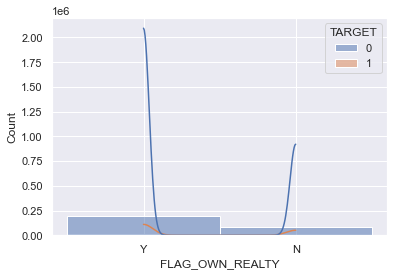

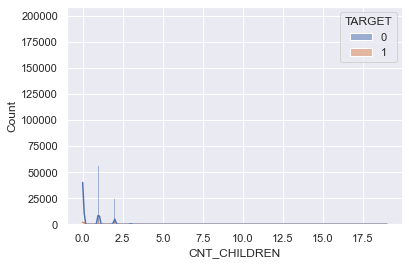

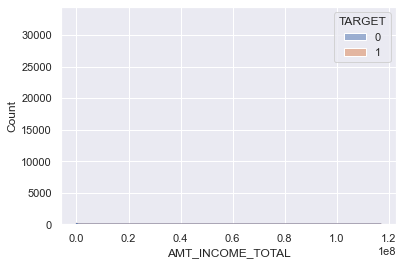

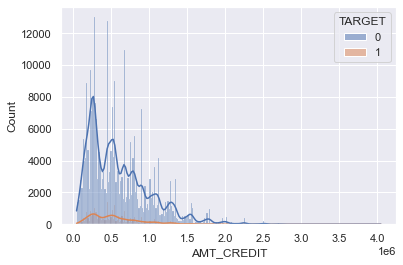

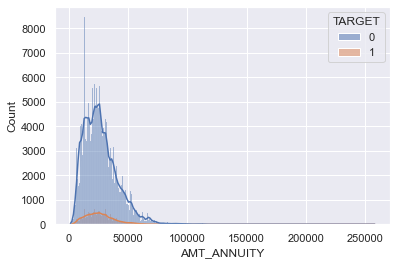

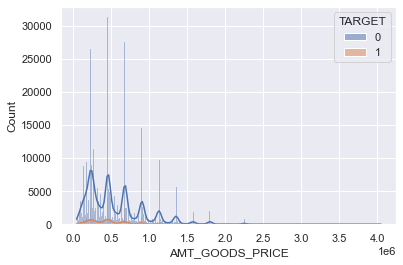

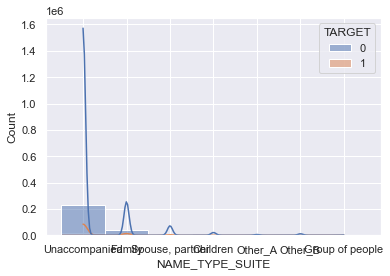

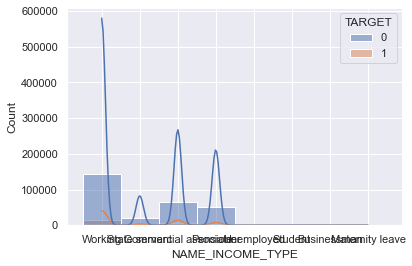

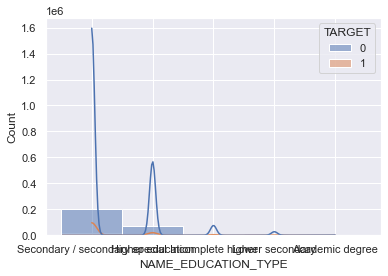

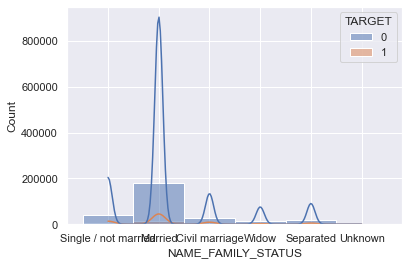

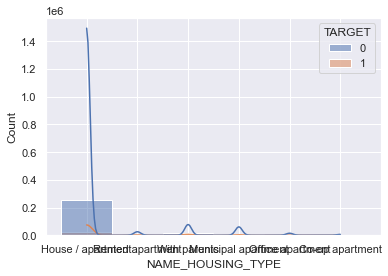

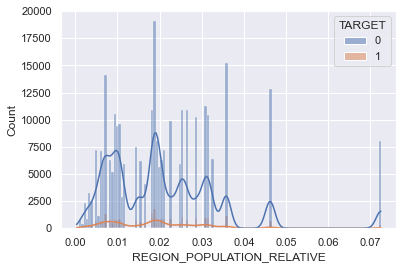

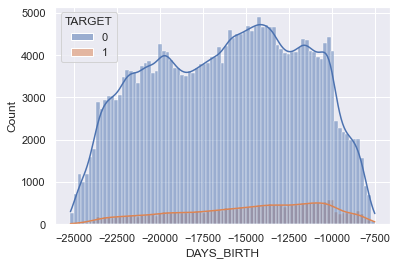

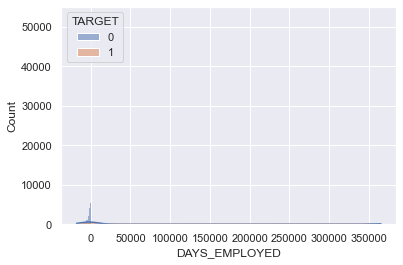

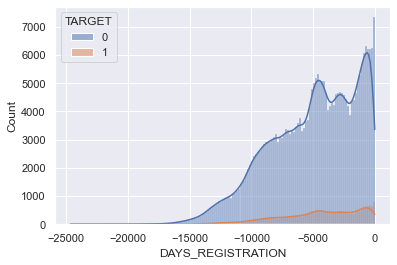

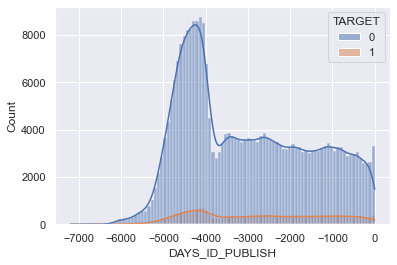

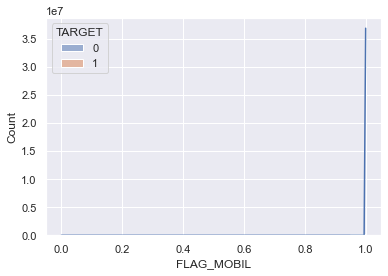

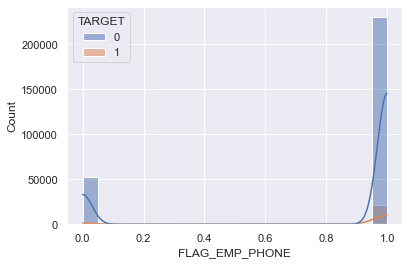

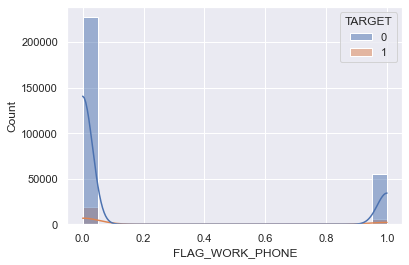

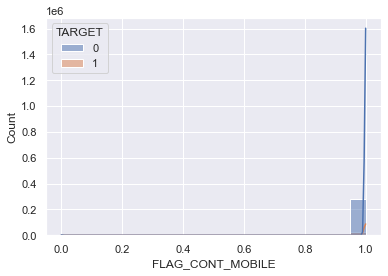

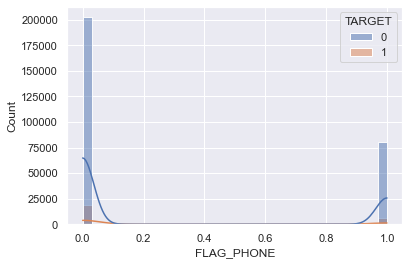

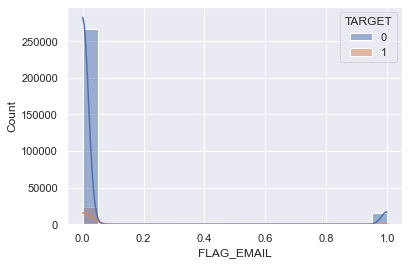

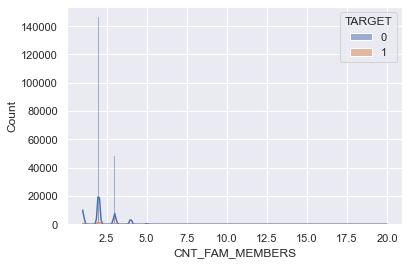

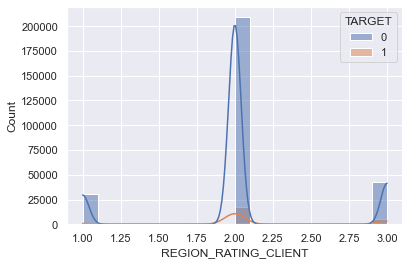

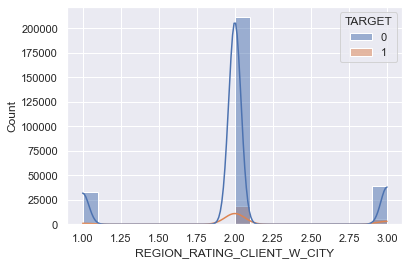

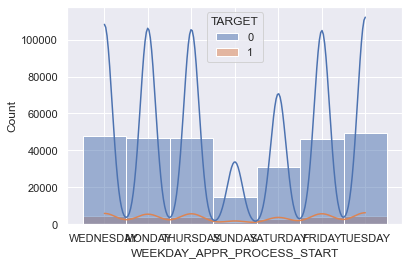

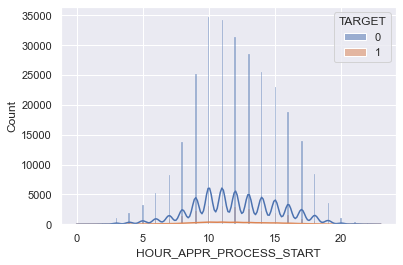

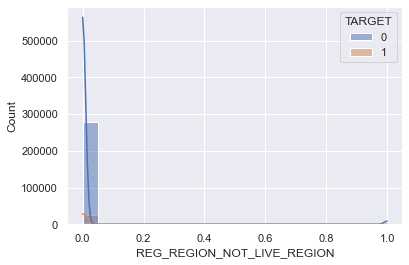

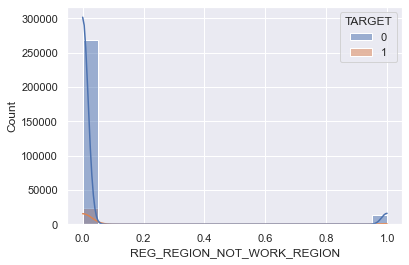

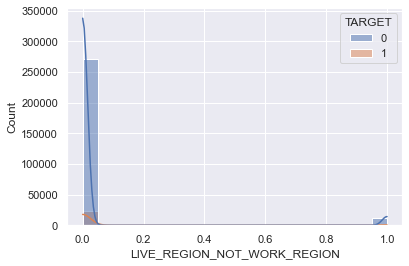

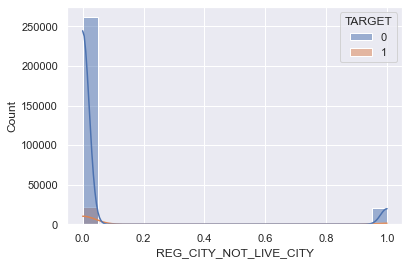

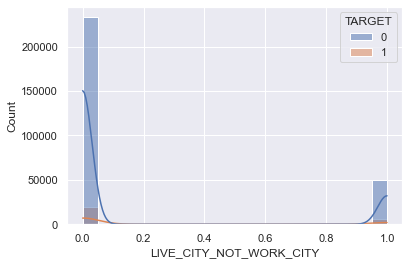

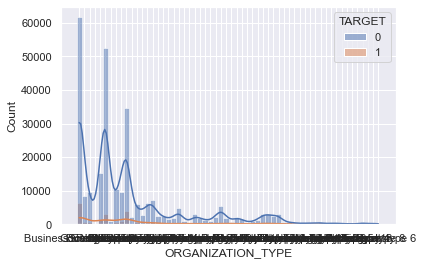

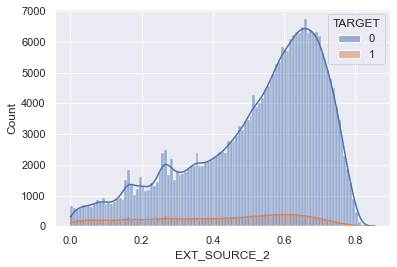

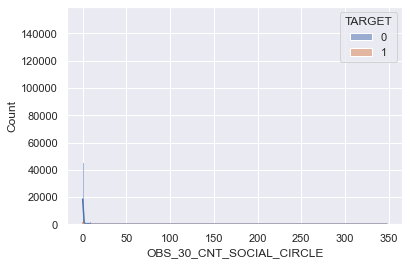

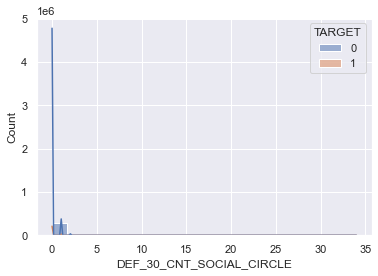

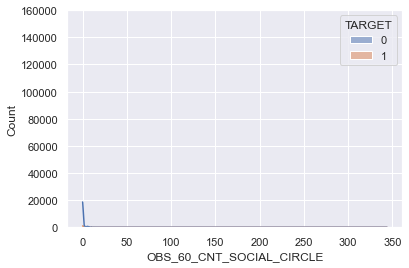

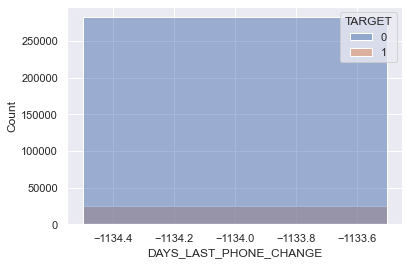

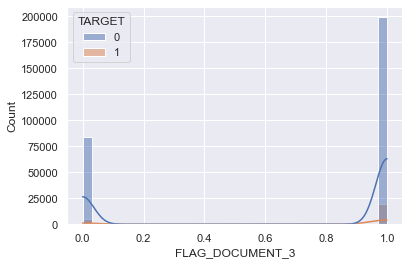

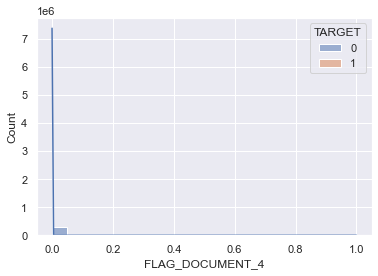

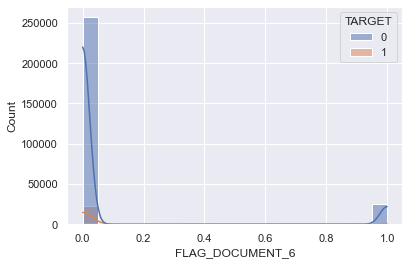

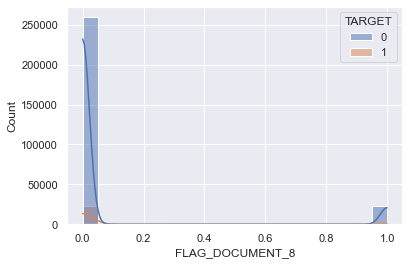

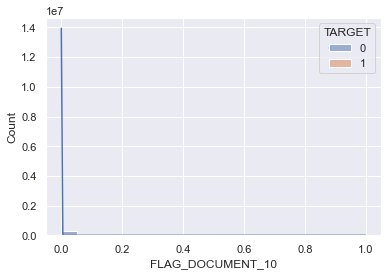

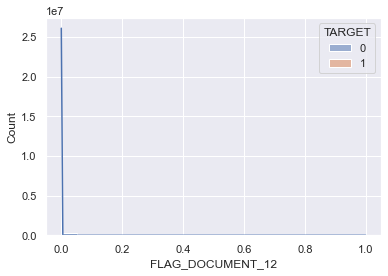

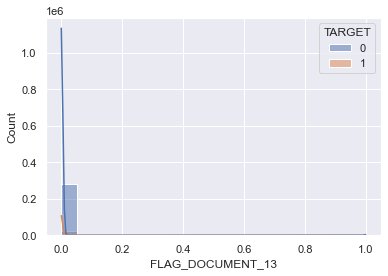

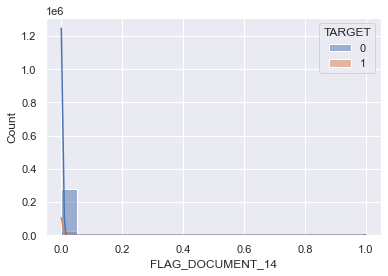

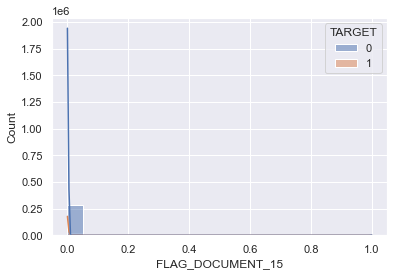

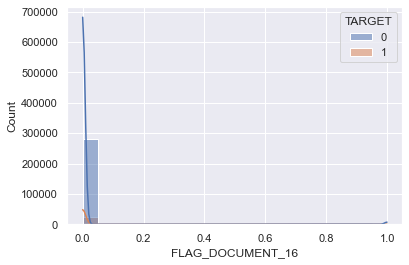

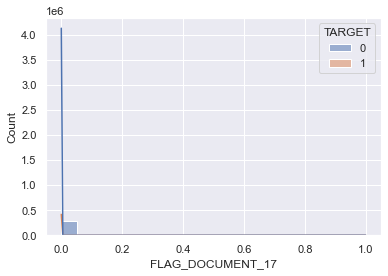

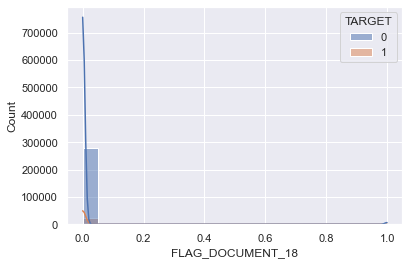

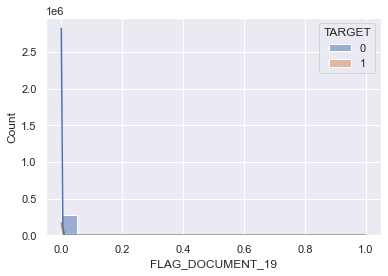

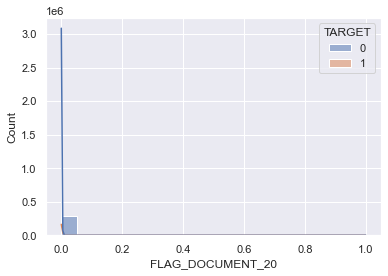

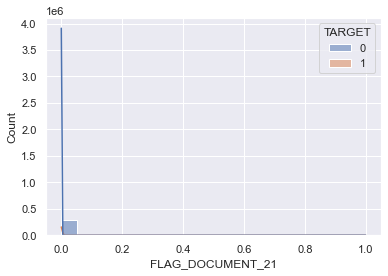

In [112]:
import seaborn as sns

for col in train_data.columns:
    sns.histplot(data=train_data, x=col, hue='TARGET', kde=True)
    plt.show()


In [113]:
train_data[train_data.duplicated()]


Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21]
Index: []

[0 rows x 65 columns]

Дублікатів у даних не виявлено.

Побудуємо boxplot для кожної ознаки

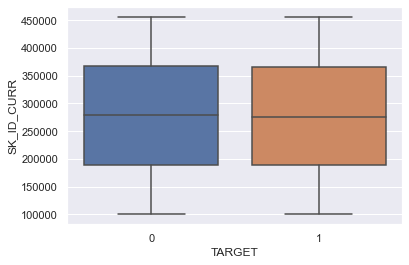

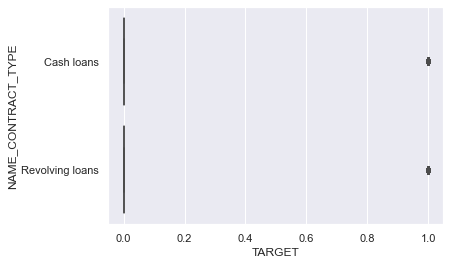

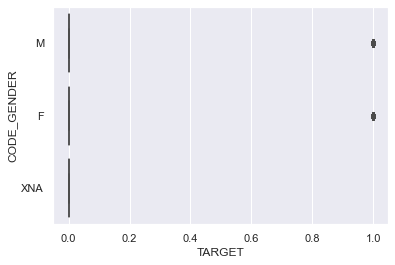

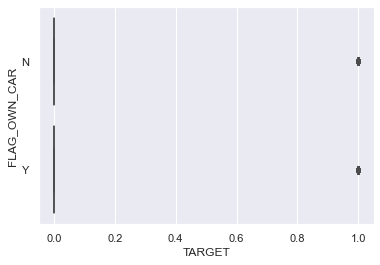

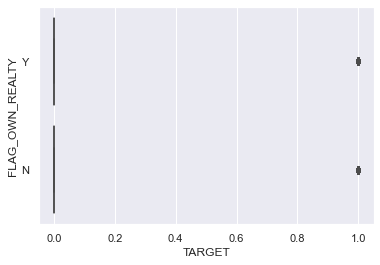

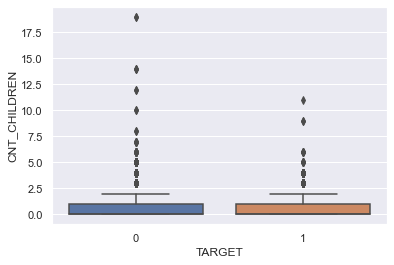

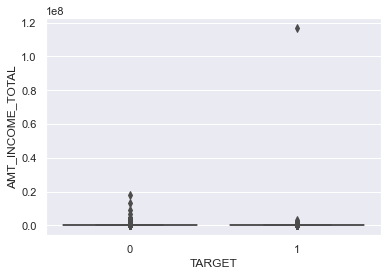

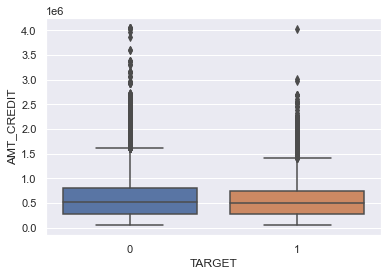

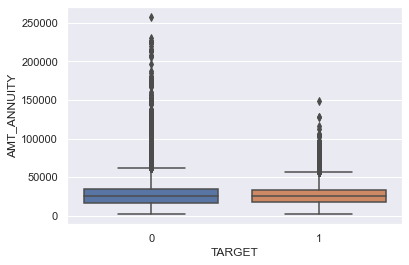

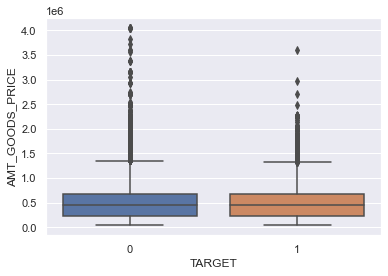

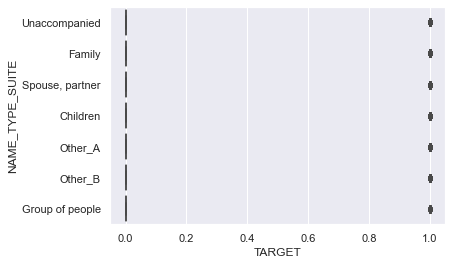

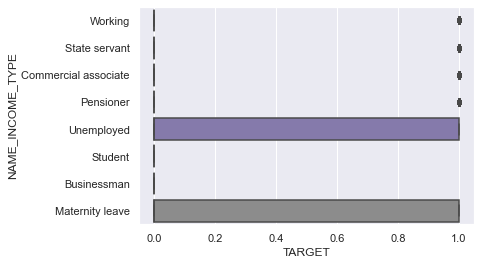

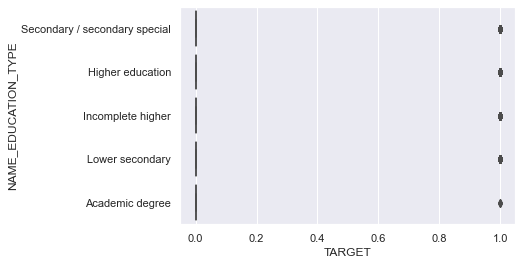

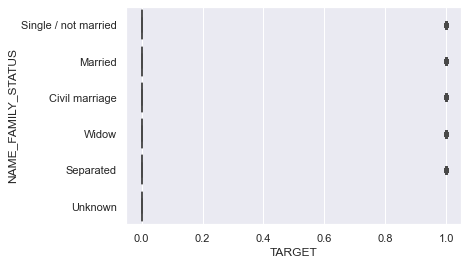

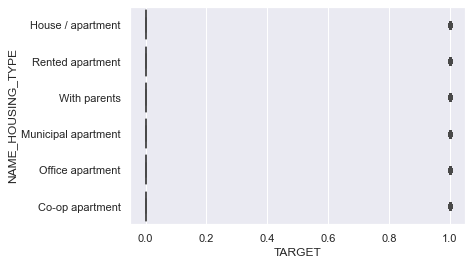

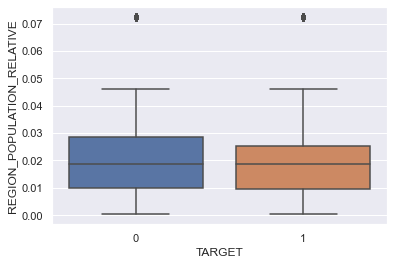

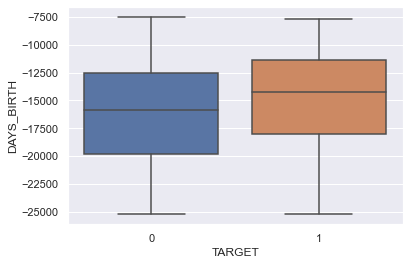

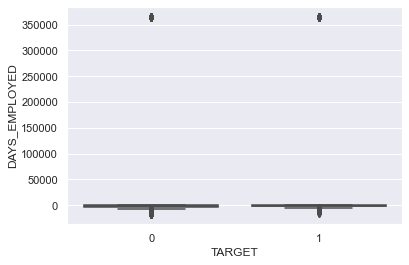

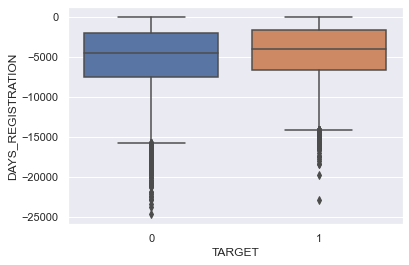

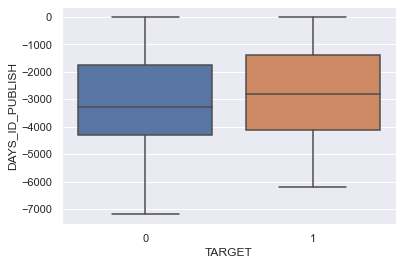

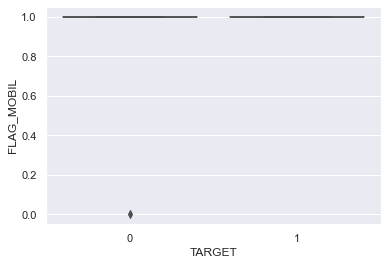

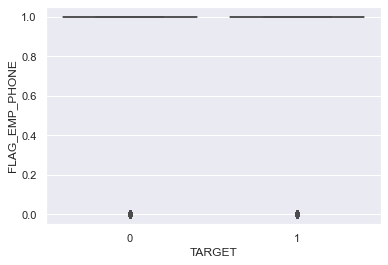

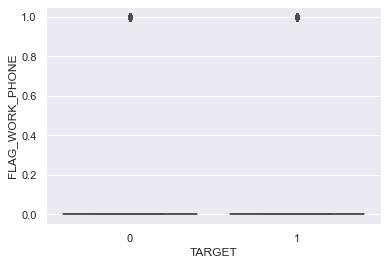

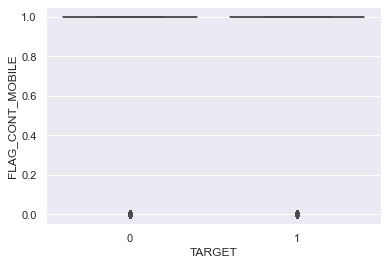

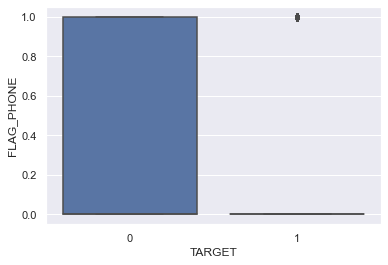

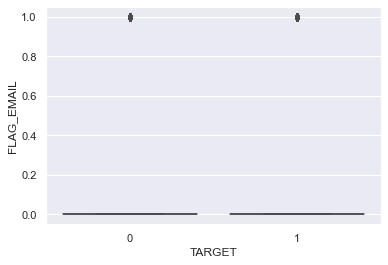

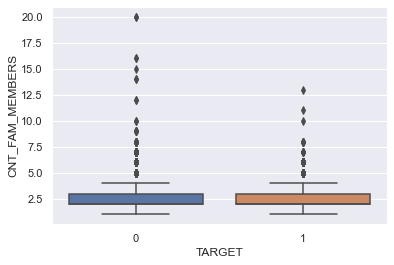

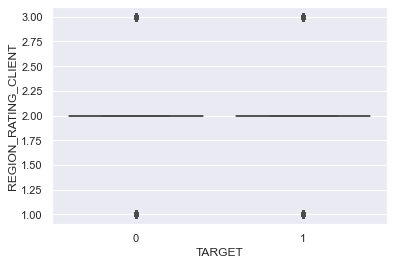

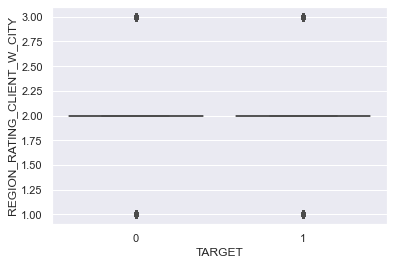

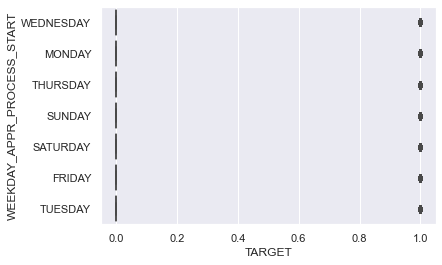

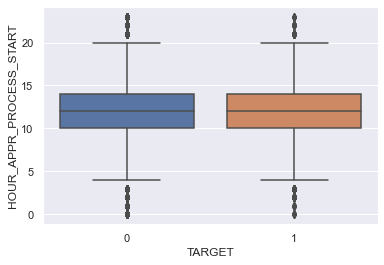

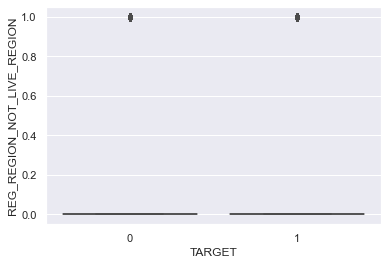

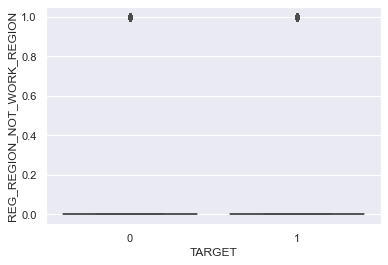

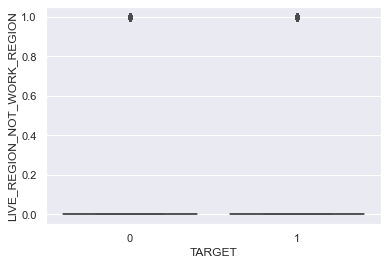

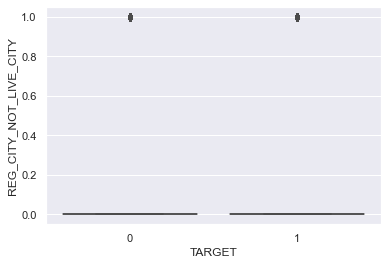

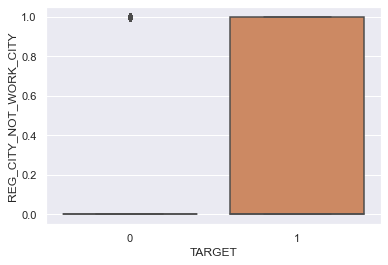

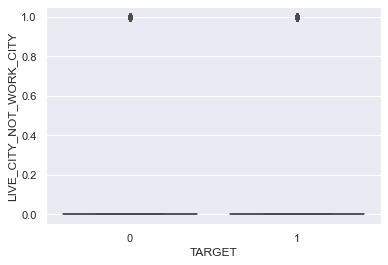

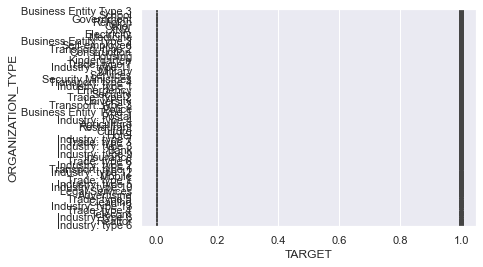

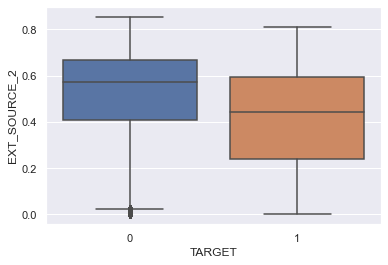

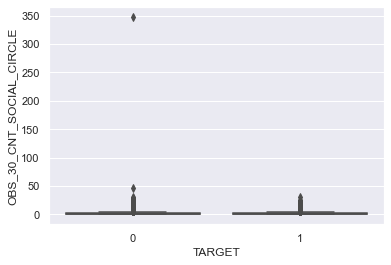

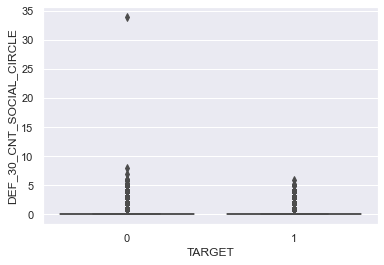

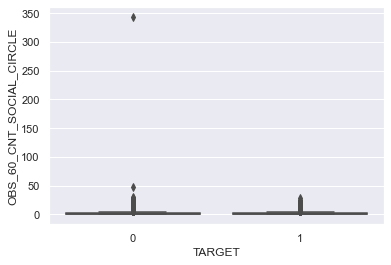

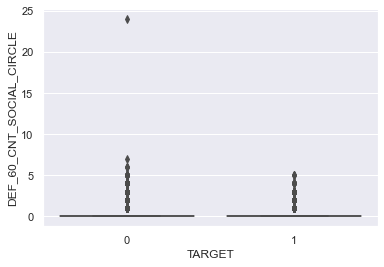

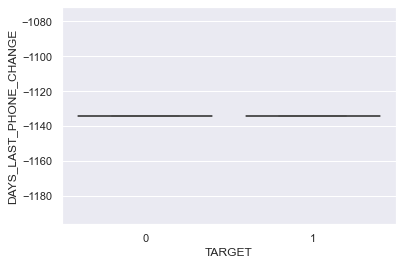

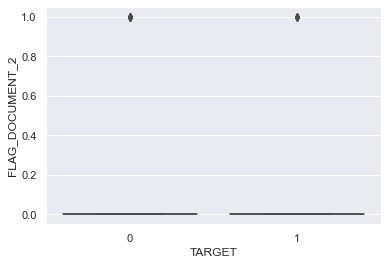

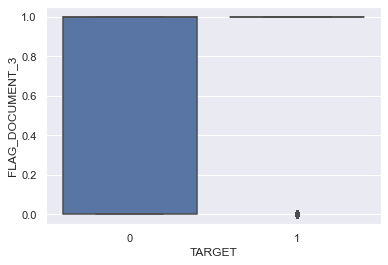

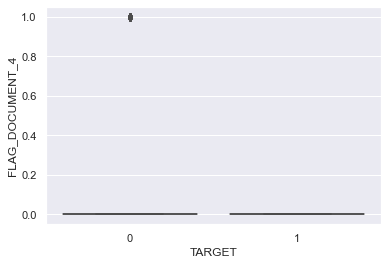

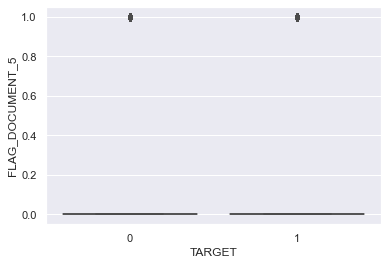

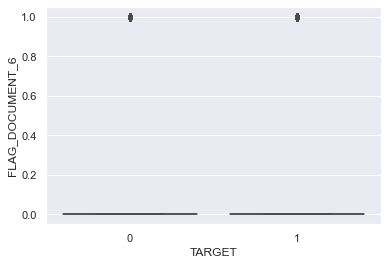

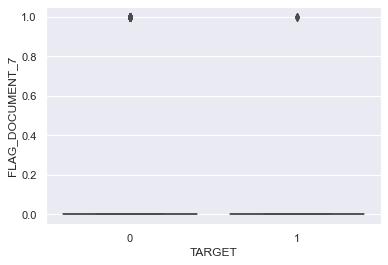

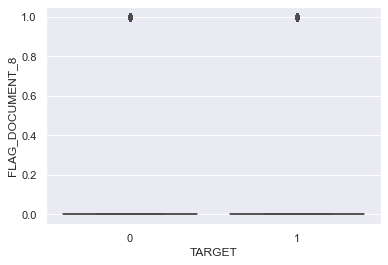

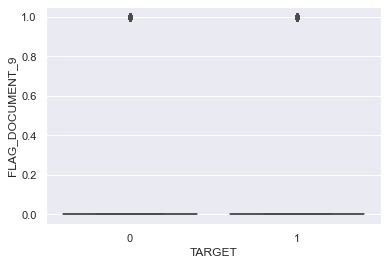

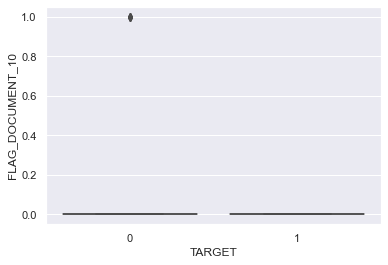

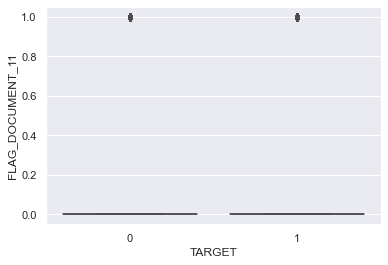

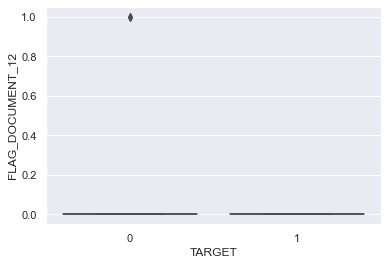

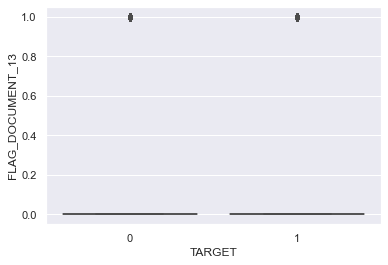

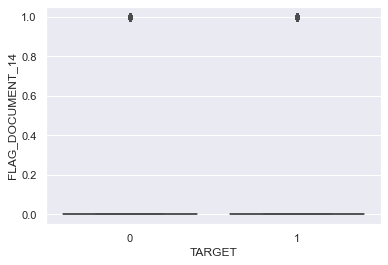

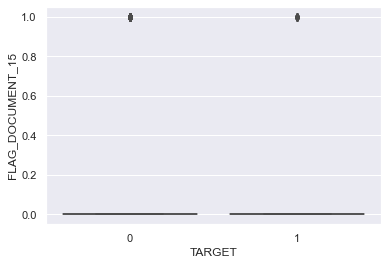

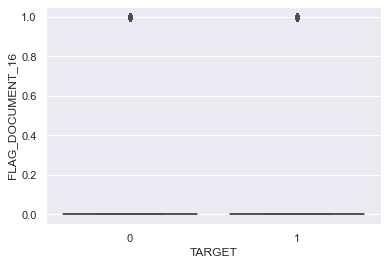

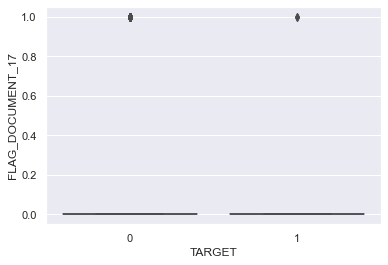

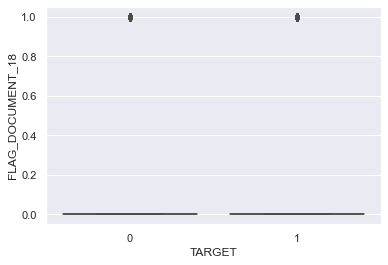

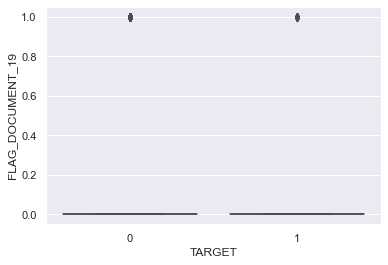

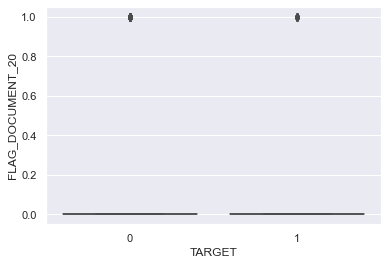

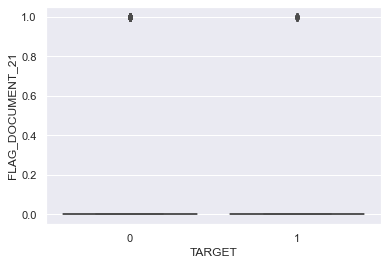

In [114]:
for col in train_data.columns:
    if col != 'TARGET':
        sns.boxplot(x='TARGET', y=col, data=train_data)
        plt.show()


Подивимось як відрізняються дані в тестовому на навчальному наборах. Побудуємо графіки розподілів

In [115]:
numerical_features = train_data.select_dtypes(include=["float64", "int64"]).columns
categorical_features = train_data.select_dtypes(include=["object"]).columns

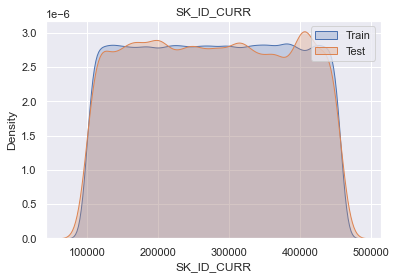

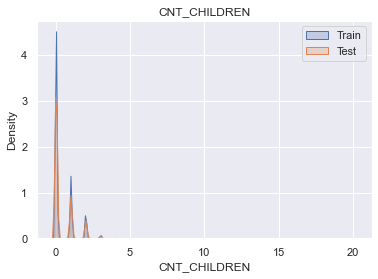

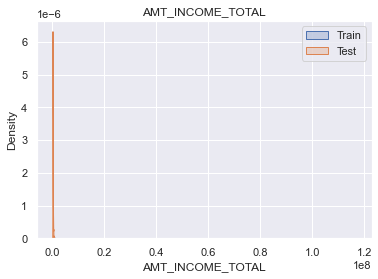

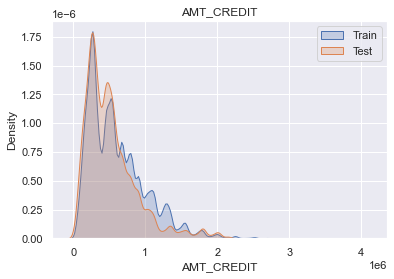

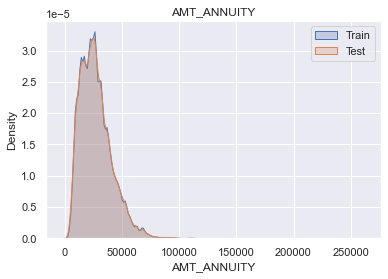

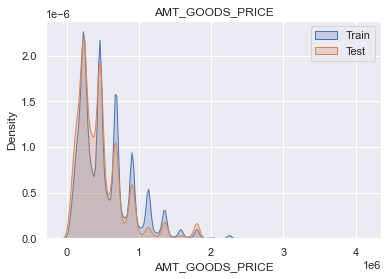

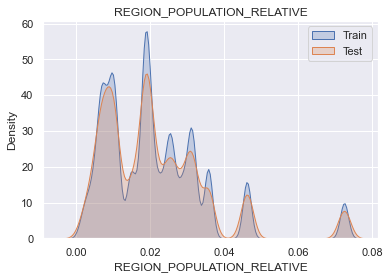

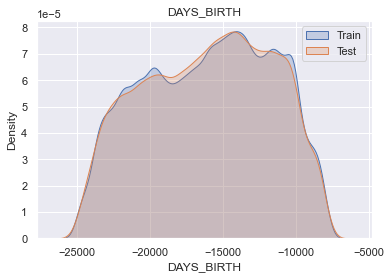

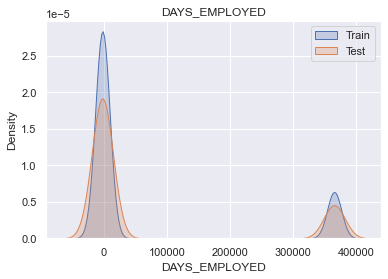

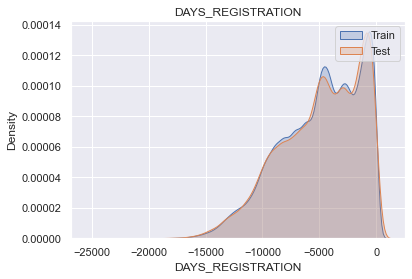

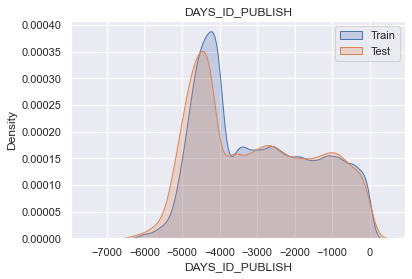

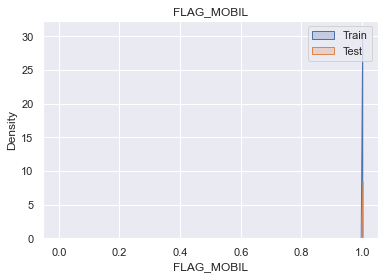

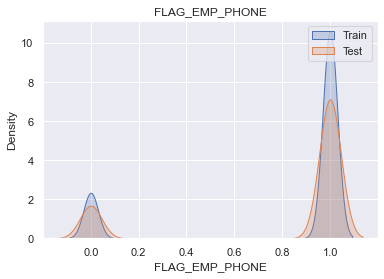

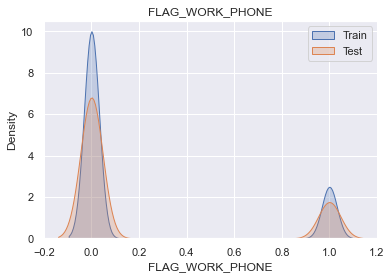

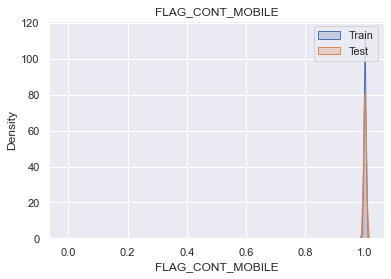

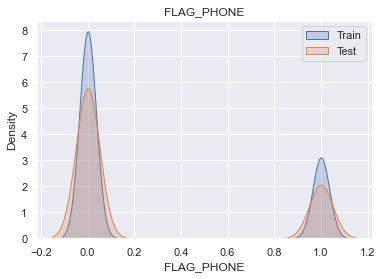

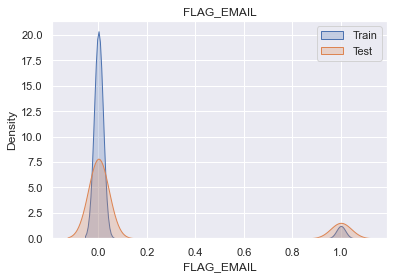

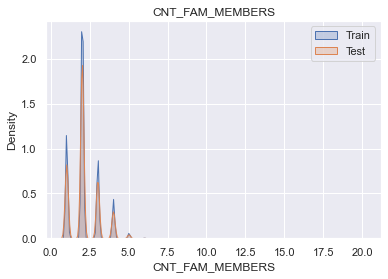

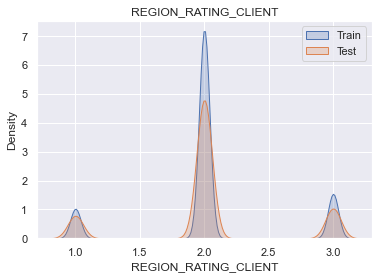

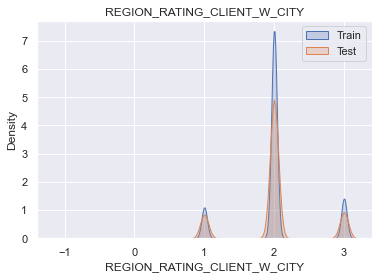

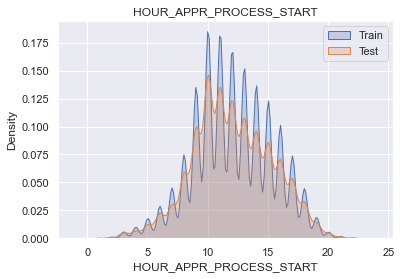

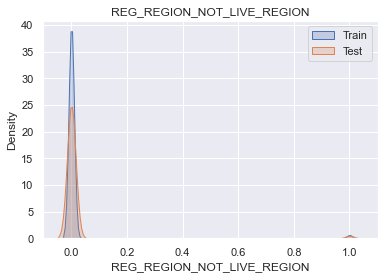

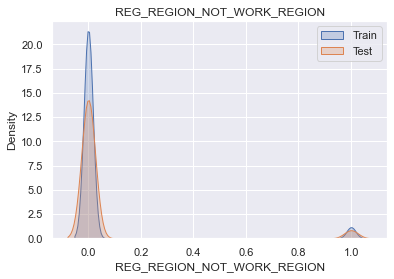

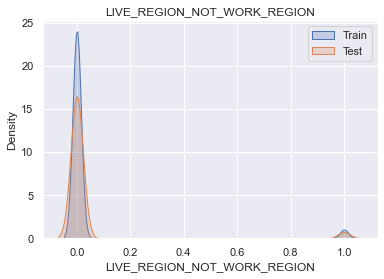

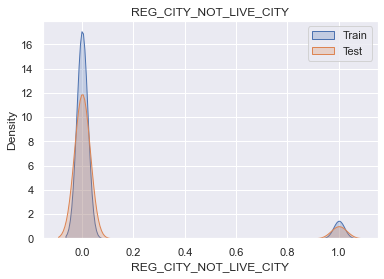

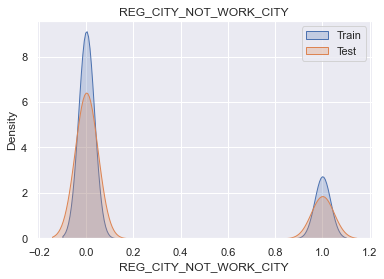

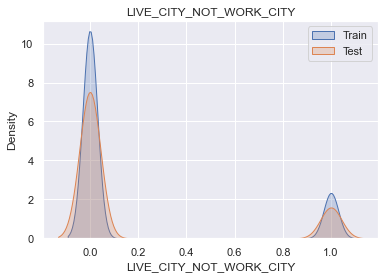

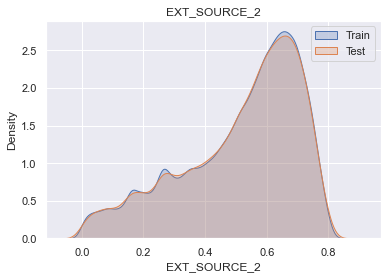

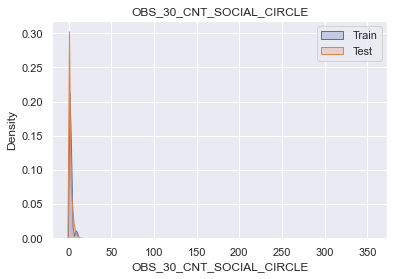

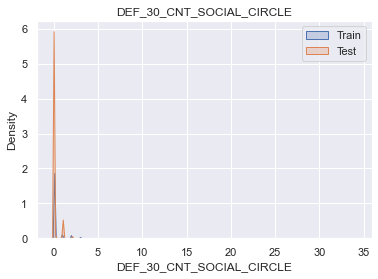

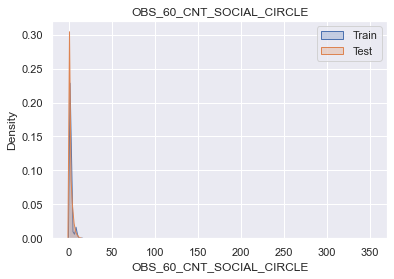

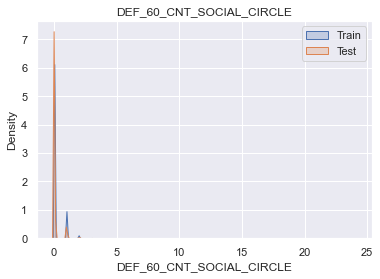

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


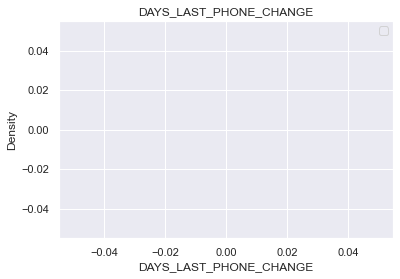

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


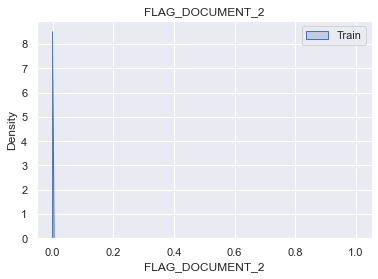

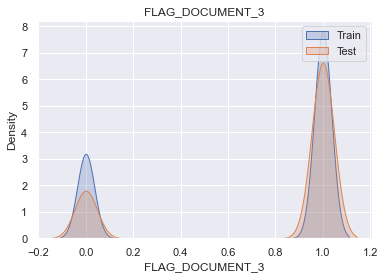

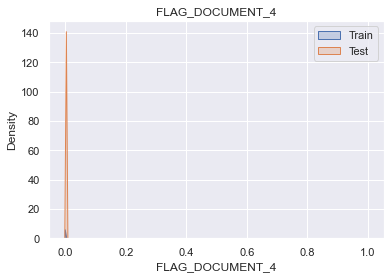

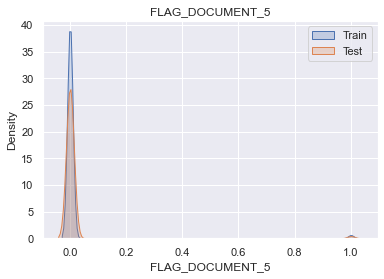

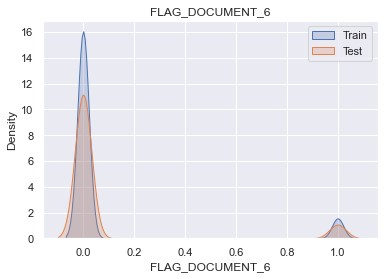

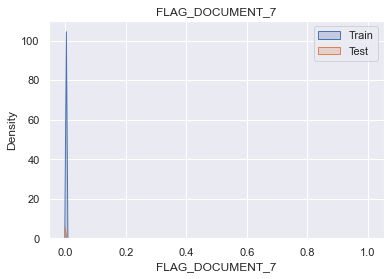

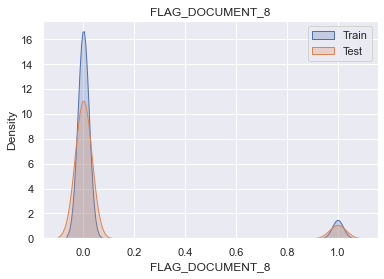

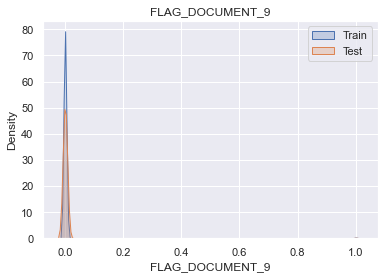

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


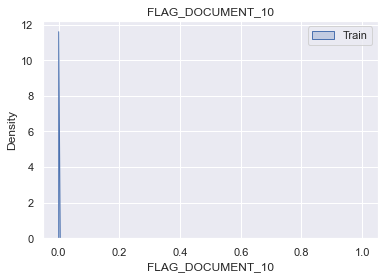

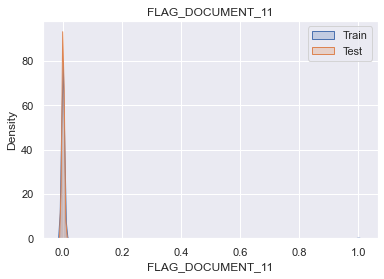

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


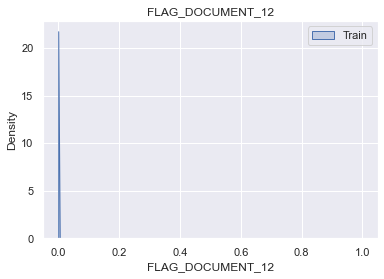

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


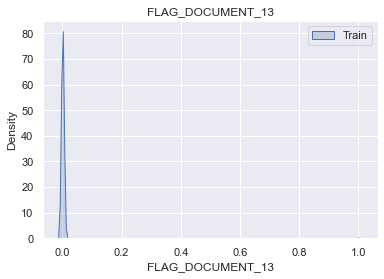

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


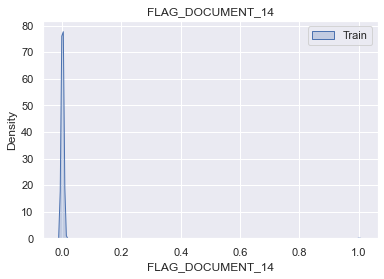

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


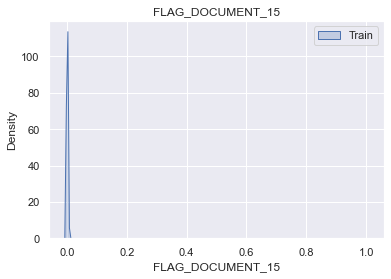

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


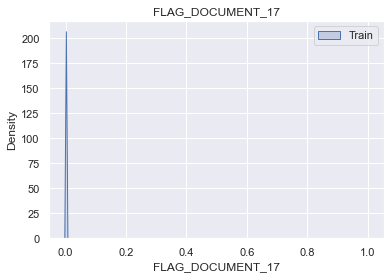

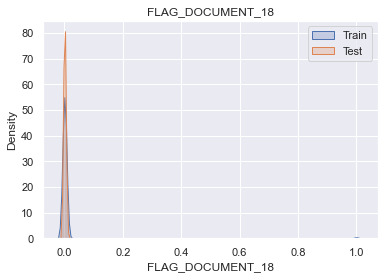

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


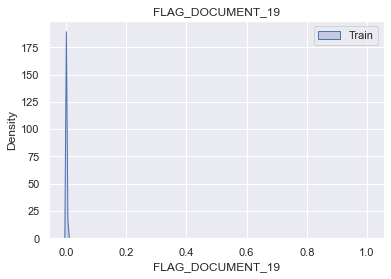

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


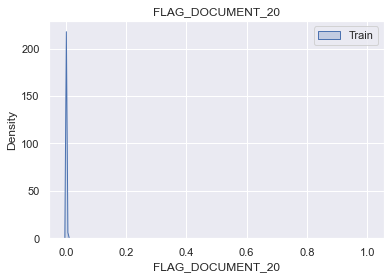

C:\conda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


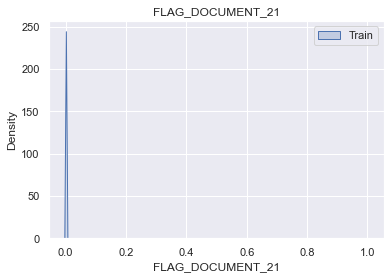

In [116]:
for feature in numerical_features:
    if feature!='TARGET':
        sns.kdeplot(data=train_data[feature], label='Train', shade=True)
        sns.kdeplot(data=test_data[feature], label='Test', shade=True)
        plt.title(feature)
        plt.legend()
        plt.show()


Проаналізувавши, розуміємо, що дані не дуже відрізняються.

Подивимось на гістограми категоріальних даних

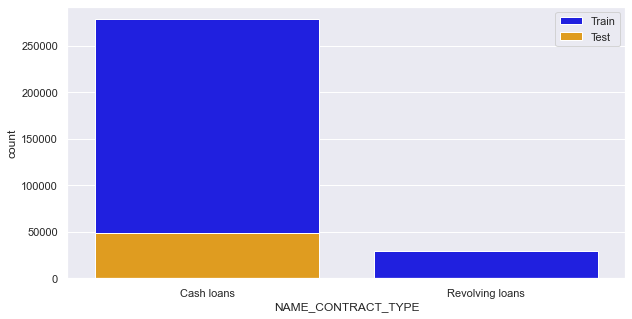

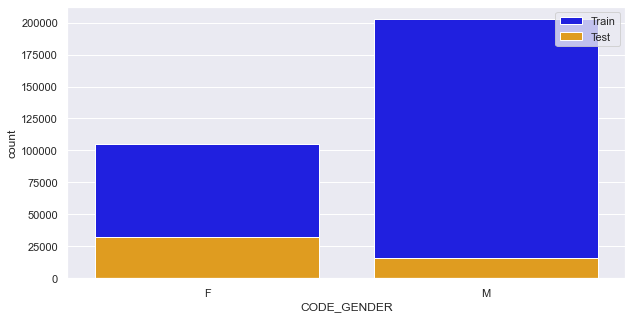

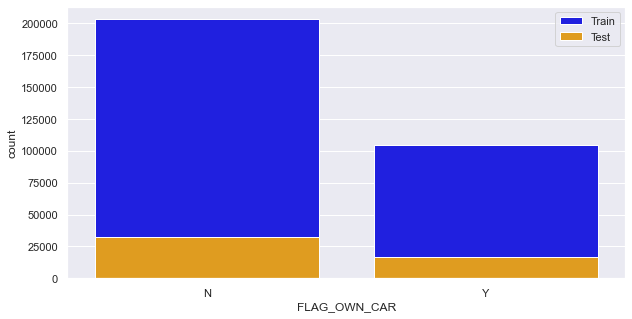

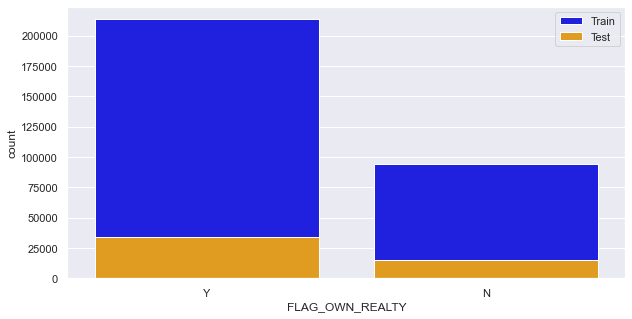

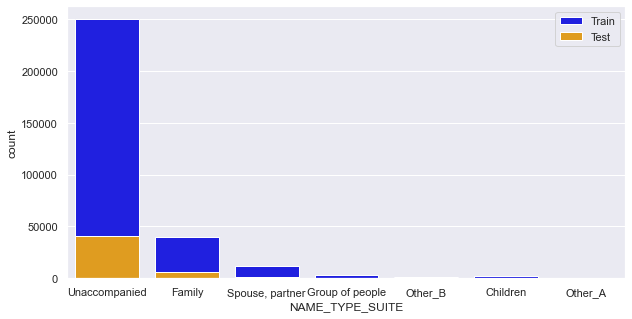

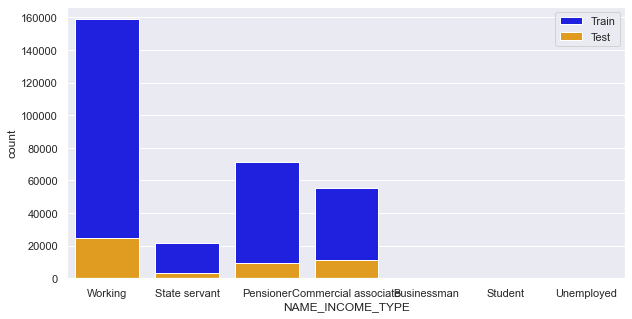

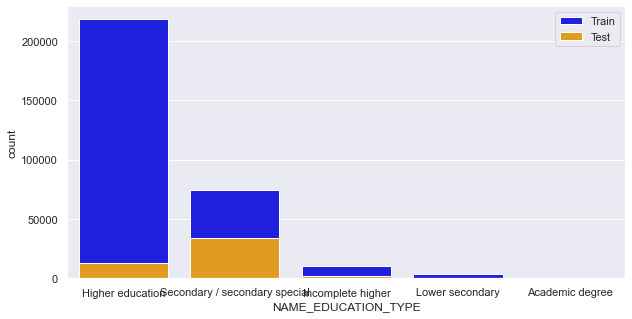

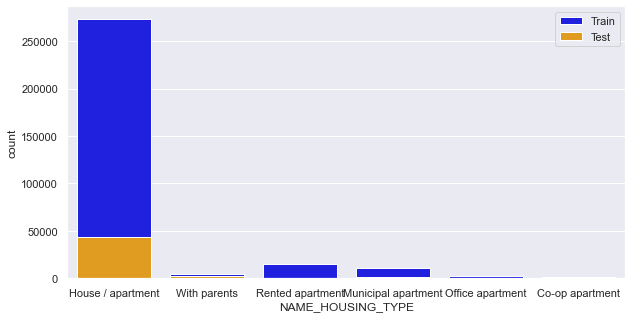

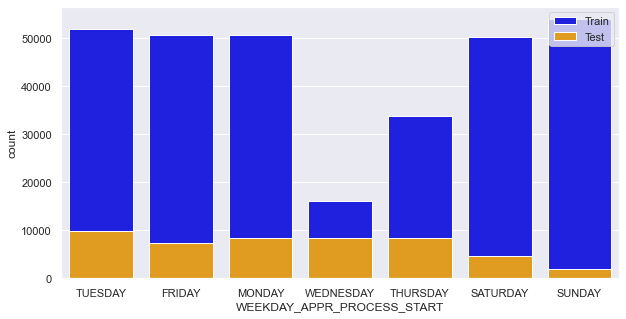

In [117]:
sns.set(style="darkgrid")
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col, data=train_data, color='blue', label='Train')
    sns.countplot(x=col, data=test_data, color='orange', label='Test')
    ax.legend(loc='upper right')
    plt.show()


In [118]:
X_train = train_data.drop('TARGET', axis = 1)
y_train = train_data['TARGET']

In [119]:
X_test = test_data

Використаємо OneHotEncoder, щоб закодувати категоріальні дані, та стандартизуємо за допомогою StandardScaler

In [120]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features.drop("TARGET"))
    ]
)
transformer.fit(train_data)

# применение preprocessor к тренировочному набору данных
X_train = transformer.transform(X_train)
# применение того же preprocessor к тестовому набору данных
X_test = transformer.transform(X_test)
#X_train = pd.DataFrame(transformer.fit_transform(X_train))


In [121]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Поділимо дані з train набору на тренувальні та валідаційні

In [122]:
from sklearn.model_selection import train_test_split
X_train_s, x_valid, y_train_s, y_valid = train_test_split(X_train, y_train, 
                                                          test_size=0.25, random_state = 42)


Так як у нас незбалансовані класи, багато ознак і є закодовані дані, гарно підійде модель логістичної регресії.

In [141]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight = "balanced", max_iter=3000).fit(X_train_s, y_train_s)

In [142]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
y_predict = clf.predict(x_valid)
precision = precision_score(y_valid, y_predict)
recall = recall_score(y_valid, y_predict)
f1 = f1_score(y_valid, y_predict)


In [143]:
print('precision = ', precision, '\nrecall = ', recall, '\nf1 = ', f1)

precision =  0.14340537996451974 
recall =  0.6397997092553707 
f1 =  0.23429551638471546


In [144]:
y_pred_proba = clf.predict_proba(x_valid)[:,1]
roc_auc = roc_auc_score(y_valid, y_pred_proba)

In [145]:
print('roc auc score = ', roc_auc)

roc auc score =  0.70936308664812


In [146]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_train, y_train) 
plt.show()

C:\conda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Тепер закодуємо категоріальні дані і стандартизуємо з тестового набору.

In [147]:
for col in test_data.columns:
    print(col, test_data[col].isna().sum())


SK_ID_CURR 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 0
AMT_GOODS_PRICE 0
NAME_TYPE_SUITE 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
CNT_FAM_MEMBERS 0
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_2 0
OBS_30_CNT_SOCIAL_CIRCLE 0
DEF_30_CNT_SOCIAL_CIRCLE 0
OBS_60_CNT_SOCIAL_CIRCLE 0
DEF_60_CNT_SOCIAL_CIRCLE 0
DAYS_LAST_PHONE_CHANGE 0
FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCUMENT_4 0
FLAG_DOCUMENT_5 0
FLAG_DOCUMENT_6 0
FLA

In [148]:
y_test_predict = clf.predict(X_test)

запишемо результат в фінальний файл

In [151]:
final_df = pd.read_csv("sample_submission.csv")
final_df["TARGET"] = y_test_predict
final_df.to_csv("submission_final.csv", index=False)

In [152]:
final_df.head()

SK_ID_CURR  TARGET
0      100001       1
1      100005       1
2      100013       0
3      100028       0
4      100038       1

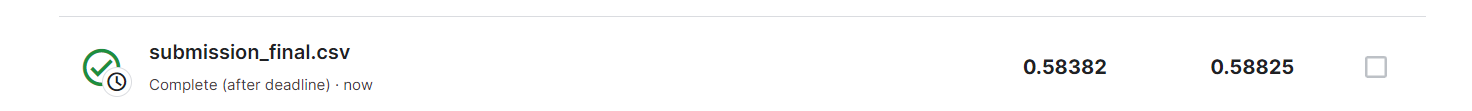